In [3]:
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

## import written functions
from time_acquire import get_items, new_stores, get_stores, get_sales, combined_data, get_germany_power


In [5]:
df = combined_data()

In [6]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


#### Question 1: Convert date column to datetime format.


In [7]:
df.sale_date = pd.to_datetime(df.sale_date) ## <-- turn the sale date to datetime format

#### Question 2: Plot the distribution of sale_amount and item_price.


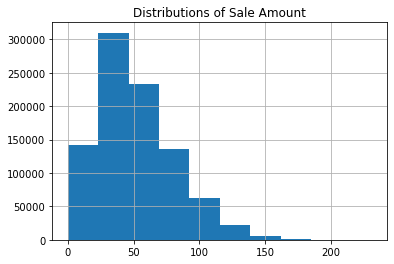

In [12]:
## plotting the distributions of sale amounts 

df.sale_amount.hist(label='Sale Amount')
plt.title('Distributions of Sale Amount')
plt.show()

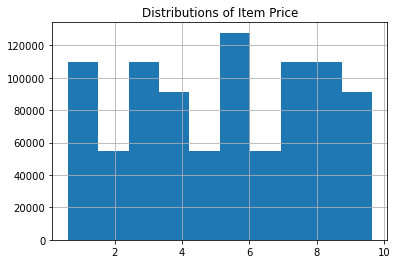

In [13]:
## plotting the distributions of item price 

df.item_price.hist(label='Item Price')
plt.title('Distributions of Item Price')
plt.show()

#### Question 3: Set the index to be the datetime variable.


In [14]:
df = df.set_index('sale_date') ## <-- setting sale date as index

#### Question 4: Add a 'month' and 'day of week' column to your dataframe.


In [15]:
## adding month and day of week columns to df

df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()

df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Wednesday
2013-01-03 00:00:00+00:00,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Thursday
2013-01-04 00:00:00+00:00,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Friday
2013-01-05 00:00:00+00:00,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Saturday


#### Question 5: Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [16]:
df['sales_total'] = df.sale_amount * df.item_price ## <-- making sales total column

### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:



In [17]:
german_power = get_germany_power() ## <-- getting the german power data

german_power.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


#### Question 1: Convert date column to datetime format.


In [18]:
german_power.Date = pd.to_datetime(german_power.Date) ## <-- converting date to date time format

#### Question 2: Plot the distribution of each of your variables.


In [28]:
cols = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

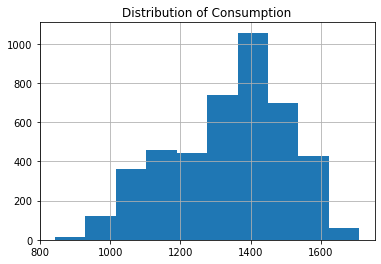

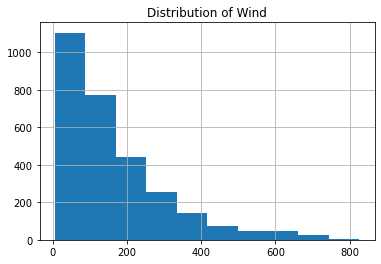

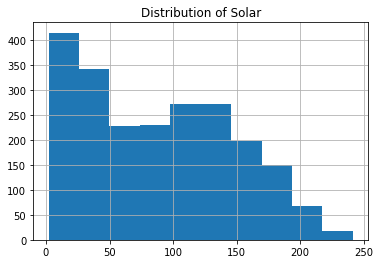

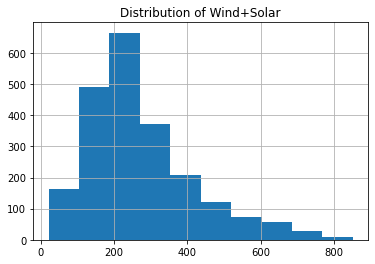

In [30]:
for col in cols:   ## <-- making for loop to plot ditributions of all columns except date
    german_power[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

#### Question 3: Set the index to be the datetime variable.


In [31]:
german_power = german_power.set_index('Date') ## <-- making the date column the index

#### Question 4: Add a month and a year column to your dataframe.


In [35]:
## making month and year columns and adding them to german power dateframe
german_power['month']=german_power.index.month
german_power['year']=german_power.index.year

german_power.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


#### Question 5: Fill any missing values.


In [36]:
german_power.isna().sum() ## <-- looking at our nulls

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [39]:
german_power = german_power.fillna(0) ## <-- filling the nulls as 0s

german_power.isna().sum() ## <-- making sure those pesky nulls are gone

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64